In [3]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [4]:
def funcao_reacao_parcial (z, t):
    
    L, OD = z # Definir as variaveis
    
    # Constantes da reação

    V = 25.6 * (10**6) #m3
    H = 5.6 #m
    Os = 9.0 #mg/L
    v_s = 1 #m/d
    L_F4 = 1.5 #mg/L
    L_TD4 = 1.7 #mg/L
    L_TE10 = 1.3 #mg/L
    OD_F4 = 8 #mg/L
    OD_TD4 = 8 #mg/L
    OD_TE10 = 8 #mg/L
    kd = 1.5 #d-1
    ka = 0.3 #d-1
    k_sed = v_s/H
    k_ra = 0.05 #d-1
    k_n = 0.1 #d-1
    k_g = 0.15 #d-1
    r_ca = 50 #gC/mgChla
    r_oc = 2.67 #gO/gC
    r_on = 4.2 #gO/gN
    L_n = 0.157 #mg/L
    alpha = 0.0128 #mg/L
    L_part = 0.5 #adimensional
    SOD = 1 #gO2/m2
    pa = r_oc*r_ca*k_g*alpha #mgOD/L

    # Balanço hidrico

    Q_F4 = 2.0  * 86400 #* 1000 #m3/d
    Q_TD4 = 0.3 * 86400 #* 1000#m3/d
    Q_TE10 = 0.15  * 86400# * 1000#m3/d
       
    bal_hid = Q_F4 + Q_TD4 + Q_TE10  
   
    #Cargas externas

    carga_L = L_F4*Q_F4 + L_TD4*Q_TD4 + L_TE10*Q_TE10
    carga_OD = OD_F4*Q_F4 + OD_TD4*Q_TD4 + OD_TE10*Q_TE10
   
    # Definir as funções
    
    dLdt = - kd*L + r_ca*r_oc*k_ra*alpha - k_sed*(1-L_part)*L - (L/V)*bal_hid + carga_L/V   
    
    dODdt = -kd*L + ka*(Os-OD) - r_on*k_n*L_n - r_ca*r_oc*k_ra*alpha - r_ca*r_oc*k_ra*alpha - (SOD/H) + pa  - (OD/V)*bal_hid + carga_OD/V  

    return dLdt, dODdt

# Condições iniciais

L0_1 = 1.5 #mg/L
OD0_1 = 5.8 #mg/L
z0_1 = L0_1, OD0_1


# Passo no tempo

t = np.linspace(0,100,300)

C:\Users\User\AppData\Local\Temp/ipykernel_8348/817804396.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')


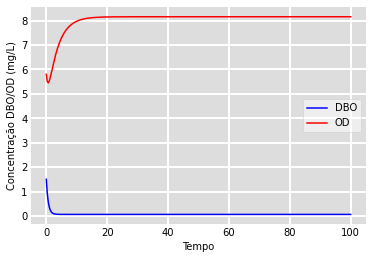

In [5]:
# Integrar as equações com odeint

funcao_teste = odeint(funcao_reacao_parcial, z0_1, t)
L1, OD1 = funcao_teste.T

# Plotar o resultado

fig1 = plt.figure(facecolor = 'w')
ax1 = fig1.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax1.plot (t, L1, 'b', label = 'DBO')
ax1.plot (t, OD1, 'r', label = 'OD')
ax1.set_xlabel ('Tempo')
ax1.set_ylabel ('Concentração DBO/OD (mg/L)')
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend1 = ax1.legend()
legend1.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
plt.show()

In [ ]:
# Correção dos dados disponíveis para os termos que variam ao longo do tempo

# Temperatura - ºC p/ Kelvin

def dados_reservatorio_interpolado(plotar=False):
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true')
    
    colunas = ['OD (mg/L)', 'temperatura (ºC)', 'fosforo_total (ug/L)',
               'fosforo_reativo (ug/L)', 'nitrog_amoniacal (ug/L)', 'nitrog_total (ug/L)',
               'nitrito (ug/L)', 'nitrato (ug/L)']
    
    data_frame = pd.DataFrame(dados['data'])
    
    cont = 0
    for c in colunas:
        if cont == 0 or cont == 1:
            interpolacao = pd.DataFrame(dados[c]).interpolate()
            data_frame = data_frame.join(interpolacao)
        else:
            interpolacao = pd.DataFrame(dados[c] * 10 ** (- 3)).interpolate()
            data_frame = data_frame.join(interpolacao)
            
        cont += 1
    
    if plotar == True:
        nomes_ajustados = ['Oxigênio Dissolvido ($\mathrm{mgL}^{-1}$)', 'Temperatura (ºC)', 'Fósforo Total ($\mathrm{mgL}^{-1}$)',
                           'Fósforo Reativo ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Amoniacal ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Total ($\mathrm{mgL}^{-1}$)',
                           'Nitrito ($\mathrm{mgL}^{-1}$)', 'Nitrato ($\mathrm{mgL}^{-1}$)']

        for i in range(len(nomes_ajustados)):
            plt.figure(figsize=(7, 5), dpi=150)
            
            if i == 1:
                plt.ylabel('Temperatura (ºC)')
            else:
                plt.ylabel('Concentração ($\mathrm{mgL}^{-1}$)')
            
            plt.xlabel('Tempo (dias)')
            plt.plot(data_frame['data'], data_frame[colunas[i]], '-', color='black', label=nomes_ajustados[i])
            plt.xticks(rotation=45)
            plt.grid(linestyle='--')
            plt.legend(loc='best')
#             plt.savefig(f'/Users/matheus/Desktop/figuras/figura_{i}')
            plt.show()
            plt.close()
    
    return data_frame.dropna()

# dados_reservatorio_interpolado()['temperatura (ºC)']

In [22]:
# Termos da equação que variam ao longo do tempo com resultados conhecidos
# Os, temperatura, L_F4, L_TD4, L_TE10, OD_F4, OD_TD4, OD_TE10, kd, ka, k_sed, k_n, k_g, Q_F4, Q_TD4, Q_TE10

# #Teste 1 - Para isso, deve-se definir essas variáveis fora da função como uma lista ou array (depende da forma que for usado pra chamar a constante) e considerá-las dentro da função criada

# Termos que variam ao longo do tempo:

#Temperatura
Temp_reservatorio_celsius = dados_reservatorio_interpolado()['temperatura (ºC)']
Temp_reservatorio_kelvin = Temp_reservatorio_celsius + 273.15

#Oxigenio de saturação
Os_temp = -139.34411 + ((1.575701*(10**5))/Temp_reservatorio_kelvin) - ((6.642308*(10**7))/(Temp_reservatorio_kelvin**2)) + ((1.243800 * (10**10))/(Temp_reservatorio_kelvin**3)) - ((8.621949 * (10**11))/(Temp_reservatorio_kelvin**4))
Os_variando = np.exp(Os_temp)



<class 'pandas.core.series.Series'>


In [ ]:
def funcao_reacao_variando (z, t, Os_variando):
    
    L, OD = z # Definir as variaveis
    
    # Constantes da reação

    V = 25.6 * (10**6) #m3
    H = 5.6 #m
    Os = 9.0 #mg/L
    v_s = 1 #m/d
    L_F4 = 1.5 #mg/L
    L_TD4 = 1.7 #mg/L
    L_TE10 = 1.3 #mg/L
    OD_F4 = 8 #mg/L
    OD_TD4 = 8 #mg/L
    OD_TE10 = 8 #mg/L
    kd = 1.5 #d-1
    ka = 0.3 #d-1
    k_sed = v_s/H
    k_ra = 0.05 #d-1
    k_n = 0.1 #d-1
    k_g = 0.15 #d-1
    r_ca = 50 #gC/mgChla
    r_oc = 2.67 #gO/gC
    r_on = 4.2 #gO/gN
    L_n = 0.157 #mg/L
    alpha = 0.0128 #mg/L
    L_part = 0.5 #adimensional
    SOD = 1 #gO2/m2
    pa = r_oc*r_ca*k_g*alpha #mgOD/L

    # Balanço hidrico

    Q_F4 = 2.0  * 86400 #* 1000 #m3/d
    Q_TD4 = 0.3 * 86400 #* 1000#m3/d
    Q_TE10 = 0.15  * 86400# * 1000#m3/d
       
    bal_hid = Q_F4 + Q_TD4 + Q_TE10  
   
    #Cargas externas

    carga_L = L_F4*Q_F4 + L_TD4*Q_TD4 + L_TE10*Q_TE10
    carga_OD = OD_F4*Q_F4 + OD_TD4*Q_TD4 + OD_TE10*Q_TE10
   
    # Definir as funções
    
    dLdt = - kd*L + r_ca*r_oc*k_ra*alpha - k_sed*(1-L_part)*L - (L/V)*bal_hid + carga_L/V   
    
    dODdt = -kd*L + ka*(Os-OD) - r_on*k_n*L_n - r_ca*r_oc*k_ra*alpha - r_ca*r_oc*k_ra*alpha - (SOD/H) + pa  - (OD/V)*bal_hid + carga_OD/V  

    return dLdt, dODdt

# Condições iniciais

L0_2 = 1.5 #mg/L
OD0_2 = 5.8 #mg/L
z0_2 = L0_2, OD0_2


# Passo no tempo

t = np.linspace(0,291,1)

In [ ]:
# Integrar as equações com odeint

funcao_teste = odeint(funcao_reacao_variando, z0_1, t)
L2, OD2 = funcao_teste.T

# Plotar o resultado

fig2 = plt.figure(facecolor = 'w')
ax2 = fig2.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax2.plot (t, L2, 'b', label = 'DBO')
ax2.plot (t, OD2, 'r', label = 'OD')
ax2.set_xlabel ('Tempo')
ax2.set_ylabel ('Concentração DBO/OD (mg/L)')
ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
legend2 = ax2.legend()
legend2.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax2.spines[spine].set_visible(False)
plt.show()